# Módulo de Programação Python

# Trilha Python - Aula 20: Utilizando Pandas - Avançado

<img align="center" style="padding-right:10px;" src="Figuras/aula-18_fig_01.png">

__Objetivo__:  Trabalhar com pacotes e módulos disponíveis em python: __Pandas__: Apresentar recursos do __Pandas__ para trabalhar séries. temporais.

Conteúdo: Trabalhando com séries temporais. Datas e horas em __Python__. Série temporal do __Pandas__: indexação por tempo. Estruturas de dados para séries temporais em __Pandas__. Frequências e compensações. Reamostragem, mudança e janelamento.

## Trabalhando com séries temporais

O __Pandas__ foi desenvolvido no contexto da modelagem financeira, portanto, como seria de esperar, ele contém um conjunto bastante extenso de ferramentas para trabalhar com datas, horas e dados indexados por tempo.
Os dados de data e hora vêm em alguns sabores, que discutiremos aqui:

- _Carimbos de hora_ fazem referência a momentos específicos (por exemplo, 4 de julho de 2015 às 7h).
- _Intervalos de tempo_ e _períodos_ referem-se a um período de tempo entre um ponto inicial e final específico; por exemplo, o ano de 2015. Os períodos geralmente fazem referência a um caso especial de intervalos de tempo em que cada intervalo tem duração uniforme e não se sobrepõe (por exemplo, períodos de 24 horas compreendendo dias).
- _Deltas ou durações de tempo_ referem-se a um período de tempo exato (por exemplo, uma duração de 22,56 segundos).

Começaremos com uma breve discussão sobre ferramentas para lidar com datas e horas em __Python__, antes de passarmos mais especificamente para uma discussão sobre as ferramentas fornecidas pelo __Pandas__.

Depois de listar alguns recursos mais aprofundados, revisaremos alguns pequenos exemplos de trabalho com dados de série temporal no __Pandas__.

## Datas e horários em Python

O mundo __Python__ tem várias representações disponíveis de datas, horas, deltas e intervalos de tempo.

Embora as ferramentas de série temporal fornecidas pelo __Pandas__ tendam a ser muito úteis para aplicações de ciência de dados, é útil ver sua relação com outros pacotes usados em __Python__.

### Datas e horas nativas do Python: ``datetime`` e ``dateutil``

Os objetos básicos do Python para trabalhar com datas e horas residem no módulo ``datetime`` da biblioteca padrão.

Junto com o módulo ``dateutil`` de terceiros, você pode usá-lo para executar rapidamente uma série de funcionalidades úteis em datas e horas.

Por exemplo, você pode construir manualmente uma data usando o tipo ``datetime``.

In [1]:
from datetime import datetime
datetime(year=2024, month=1, day=10)

datetime.datetime(2024, 1, 10, 0, 0)

Ou, usando o módulo ``dateutil``, você pode analisar datas de uma variedade de formatos de string.

In [3]:
from dateutil import parser
#date = parser.parse("7/1/2024")
date = parser.parse("7/1/2024", dayfirst=True)
date

datetime.datetime(2024, 1, 7, 0, 0)

Depois de ter um objeto ``datetime``, você pode fazer coisas como imprimir o dia da semana.

In [4]:
date.strftime('%A')

'Sunday'

Aqui, usamos um dos códigos de formato de _string_ padrão para impressão de datas (``"%A"``), sobre o qual você pode ler na [seção strftime](https://docs.python. org/3/library/datetime.html#strftime-and-strptime-behavior) da [documentação de data e hora] do Python (https://docs.python.org/3/library/datetime.html).

A documentação de outros utilitários de data úteis pode ser encontrada na [documentação online do dateutil](http://labix.org/python-dateutil).

O poder de ``datetime`` e ``dateutil`` reside em sua flexibilidade e sintaxe fácil. Podemos usar esses objetos e seus métodos para executar facilmente praticamente qualquer operação que possa lhe interessar.

Eles falham apenas quando você deseja trabalhar com grandes conjuntos de datas e horas.

Assim como as listas de variáveis ​​numéricas do __Python__ são abaixo do ideal em comparação com as matrizes numéricas digitadas no estilo __NumPy__, as listas de objetos de data e hora do __Python__ são abaixo do ideal em comparação com as matrizes digitadas de datas codificadas.

### Matrizes de tempos: ``datetime64`` do NumPy

Os pontos fracos do formato datetime do __Python__ inspiraram a equipe do __NumPy__ a adicionar um conjunto de tipos de dados de série temporal nativos ao __NumPy__.

O dtype ``datetime64`` codifica datas como números inteiros de 64 bits e, portanto, permite que matrizes de datas sejam representadas de forma muito compacta.

O ``datetime64`` requer um formato de entrada muito específico.

In [5]:
import numpy as np
date = np.array('2024-01-10', dtype=np.datetime64)
date

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


array('2024-01-10', dtype='datetime64[D]')

Uma vez formatada esta data, no entanto, podemos realizar rapidamente operações vetorizadas nela.

In [8]:
date + np.arange(12)

array(['2024-01-10', '2024-01-11', '2024-01-12', '2024-01-13',
       '2024-01-14', '2024-01-15', '2024-01-16', '2024-01-17',
       '2024-01-18', '2024-01-19', '2024-01-20', '2024-01-21'],
      dtype='datetime64[D]')

Por causa do tipo uniforme nos arrays ``datetime64`` do __NumPy__, este tipo de operação pode ser realizada muito mais rapidamente do que se estivéssemos trabalhando diretamente com os objetos ``datetime`` do Python, especialmente à medida que os arrays ficam grandes.

Um detalhe dos objetos ``datetime64`` e ``timedelta64`` é que eles são construídos em uma _unidade de tempo fundamental_.

Como o objeto ``datetime64`` é limitado à precisão de 64 bits, o intervalo de tempos codificáveis é $2^{64}$ vezes esta unidade fundamental.

Em outras palavras, ``datetime64`` impõe uma compensação entre _resolução de tempo_ e _intervalo de tempo máximo_.

Por exemplo, se você deseja uma resolução de tempo de um nanossegundo, você só tem informações suficientes para codificar um intervalo de $2^{64}$ nanossegundos, ou pouco menos de 600 anos.

NumPy irá inferir a unidade desejada a partir da entrada.

In [12]:
# aqui está uma data e hora baseada no dia
np.datetime64('2024-01-10') + np.arange(10)

array(['2024-01-10', '2024-01-11', '2024-01-12', '2024-01-13',
       '2024-01-14', '2024-01-15', '2024-01-16', '2024-01-17',
       '2024-01-18', '2024-01-19'], dtype='datetime64[D]')

In [13]:
#Aqui está uma data e hora baseada em minutos
np.datetime64('2024-01-10 12:00') + np.arange(10)

array(['2024-01-10T12:00', '2024-01-10T12:01', '2024-01-10T12:02',
       '2024-01-10T12:03', '2024-01-10T12:04', '2024-01-10T12:05',
       '2024-01-10T12:06', '2024-01-10T12:07', '2024-01-10T12:08',
       '2024-01-10T12:09'], dtype='datetime64[m]')

Observe que o fuso horário é automaticamente definido para a hora local no computador que executa o código.

Você pode forçar qualquer unidade fundamental desejada usando um dos vários códigos de formato; por exemplo.

In [14]:
#aqui forçaremos um tempo baseado em nanossegundos
np.datetime64('2015-07-04 12:59:59.50', 'ns') 

numpy.datetime64('2015-07-04T12:59:59.500000000')

A tabela a seguir, extraída da [documentação NumPy datetime64](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), lista os códigos de formato disponíveis junto com os intervalos de tempo relativos e absolutos que eles pode codificar

|Código  | significado | Intervalo de tempo (relativo)  | Intervalo de tempo (absoluto)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

Para os tipos de dados que vemos no mundo real, um padrão útil é ``datetime64[ns]``, pois ele pode codificar um intervalo útil de datas modernas com uma precisão adequada.

Finalmente, notaremos que embora o tipo de dados ``datetime64`` resolva algumas das deficiências do tipo ``datetime`` integrado do __Python__, ele carece de muitos dos métodos e funções convenientes fornecidos por ``datetime`` e especialmente ``dateutil``.

Mais informações podem ser encontradas na [documentação datetime64 do NumPy](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

### Datas e horários em pandas: o melhor dos dois mundos

O __Pandas__ baseia-se em todas as ferramentas que acabamos de discutir para fornecer um objeto ``Timestamp``, que combina a facilidade de uso de ``datetime`` e ``dateutil`` com o armazenamento eficiente e a interface vetorizada de ``numpy. datahora64``.

A partir de um grupo desses objetos ``Timestamp``, o Pandas pode construir um ``DatetimeIndex`` que pode ser usado para indexar dados em um ``Series`` ou ``DataFrame``.

Por exemplo, podemos usar as ferramentas Pandas para repetir alguns dos exemplos anteriores.

Podemos analisar uma data de string com formatação flexível e usar códigos de formato para gerar o dia da semana.

In [17]:
import pandas as pd
#date = pd.to_datetime("10/01/2024")
date = pd.to_datetime("10/01/2024", dayfirst=True)
date

Timestamp('2024-01-10 00:00:00')

In [18]:
date.strftime('%A')

'Wednesday'

Além disso, podemos fazer operações vetorizadas no estilo __NumPy__ diretamente neste mesmo objeto.

In [19]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2024-01-10', '2024-01-11', '2024-01-12', '2024-01-13',
               '2024-01-14', '2024-01-15', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19', '2024-01-20', '2024-01-21'],
              dtype='datetime64[ns]', freq=None)

## Série temporal do Pandas: indexação por tempo

As ferramentas de série temporal do __Pandas__ realmente se tornam úteis quando você começa a _indexar dados por carimbos de data/hora_.

Por exemplo, podemos construir um objeto ``Series`` que possui dados indexados no tempo.

In [20]:
index = pd.DatetimeIndex(['2023-12-20', '2023-12-22', 
                          '2024-01-08', '2024-01-10',
                          '2024-01-12', '2024-01-15'])
data = pd.Series([(9, 10), (11, 12), (13, 14), (15, 16), (17,18), (19, 20)], 
                 index=index)
data

2023-12-20     (9, 10)
2023-12-22    (11, 12)
2024-01-08    (13, 14)
2024-01-10    (15, 16)
2024-01-12    (17, 18)
2024-01-15    (19, 20)
dtype: object

Agora que temos esses dados em uma ``Series``, podemos fazer uso de qualquer um dos modos de indexação de ``Series`` que discutimos nas seções anteriores.

In [21]:
data['2024-01-08':'2024-01-12']

2024-01-08    (13, 14)
2024-01-10    (15, 16)
2024-01-12    (17, 18)
dtype: object

Existem operações especiais adicionais de indexação apenas de data, como passar um ano para obter uma fatia de todos os dados desse ano

In [22]:
data['2024']

2024-01-08    (13, 14)
2024-01-10    (15, 16)
2024-01-12    (17, 18)
2024-01-15    (19, 20)
dtype: object

## Estruturas de dados de série temporal do Pandas

Esta seção apresentará as estruturas de dados fundamentais do __Pandas__ para trabalhar com dados de série temporal:

- Para _time stamps_, o __Pandas__ fornece o tipo ``Timestamp``. Como mencionado antes, é essencialmente um substituto para o ``datetime`` nativo do __Python__, mas é baseado no tipo de dados mais eficiente ``numpy.datetime64``. A estrutura do índice associada é ``DatetimeIndex``.
- Para _períodos de tempo_, o __Pandas__ fornece o tipo ``Period``. Isso codifica um intervalo de frequência fixa baseado em ``numpy.datetime64``. A estrutura de índice associada é ``PeriodIndex``.
- Para _deltas de tempo_, o __Pandas__ fornece o tipo ``Timedelta``. ``Timedelta`` é um substituto mais eficiente para o tipo nativo ``datetime.timedelta`` do __Python__, e é baseado em ``numpy.timedelta64``. A estrutura de índice associada é ``TimedeltaIndex``.

Os mais importantes destes objetos de data/hora são os objetos ``Timestamp`` e ``DatetimeIndex``.

Embora esses objetos possam ser invocados diretamente, é mais comum usar a função ``pd.to_datetime()``, que pode analisar uma ampla variedade de formatos.

Passar uma única data para ``pd.to_datetime()`` gera um ``Timestamp``; passar uma série de datas por padrão produz um ``DatetimeIndex``.

In [23]:
dates = pd.to_datetime([datetime(2023, 12, 20), '22 of December, 2023',
                       '2024-Jan-8', '01-10-2024', '20240112'])
dates

DatetimeIndex(['2023-12-20', '2023-12-22', '2024-01-08', '2024-01-10',
               '2024-01-12'],
              dtype='datetime64[ns]', freq=None)

Qualquer ``DatetimeIndex`` pode ser convertido em um ``PeriodIndex`` com a função ``to_period()`` com a adição de um código de frequência; aqui usaremos ``'D'`` para indicar a frequência diária.

In [24]:
dates.to_period('D')

PeriodIndex(['2023-12-20', '2023-12-22', '2024-01-08', '2024-01-10',
             '2024-01-12'],
            dtype='period[D]')

Um ``TimedeltaIndex`` é criado, por exemplo, quando uma data é subtraída de outra.

In [25]:
dates - dates[0]

TimedeltaIndex(['0 days', '2 days', '19 days', '21 days', '23 days'], dtype='timedelta64[ns]', freq=None)

### Sequências regulares: ``pd.date_range()``

Para tornar a criação de sequências de datas regulares mais conveniente, o __Pandas__ oferece algumas funções para esse propósito: 
* ``pd.date_range()`` para carimbos de data e hora, 
* ``pd.period_range()`` para períodos;  
* ``pd.timedelta_range ()`` para deltas de tempo.

Vimos que ``range()`` do __Python__ e ``np.arange()`` do __NumPy__ transformam um ponto inicial, um ponto final e um tamanho de passo opcional em uma sequência.

Da mesma forma, ``pd.date_range()`` aceita uma data de início, uma data de término e um código de frequência opcional para criar uma sequência regular de datas.

Por padrão, a frequência é de um dia.

In [26]:
pd.date_range('2023-12-20', '2024-01-12')

DatetimeIndex(['2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23',
               '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29', '2023-12-30', '2023-12-31',
               '2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12'],
              dtype='datetime64[ns]', freq='D')

De forma alternativa, o intervalo de datas pode ser especificado não com um início e um ponto final, mas com um ponto inicial e um número de períodos.

In [27]:
pd.date_range('2023-12-20', periods=24)

DatetimeIndex(['2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23',
               '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29', '2023-12-30', '2023-12-31',
               '2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12'],
              dtype='datetime64[ns]', freq='D')

O espaçamento pode ser modificado alterando o argumento ``freq``, cujo padrão é ``D``.

In [28]:
pd.date_range('2023-01-10-08:00', periods=8, freq='H')

DatetimeIndex(['2023-01-10 08:00:00', '2023-01-10 09:00:00',
               '2023-01-10 10:00:00', '2023-01-10 11:00:00',
               '2023-01-10 12:00:00', '2023-01-10 13:00:00',
               '2023-01-10 14:00:00', '2023-01-10 15:00:00'],
              dtype='datetime64[ns]', freq='H')

Para criar sequências regulares de valores ``Period`` ou ``Timedelta``, pode ser utilizadas funções, muito semelhantes, ``pd.period_range()`` e ``pd.timedelta_range()``.

In [29]:
pd.period_range('2024-01', periods=8, freq='M')

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08'],
            dtype='period[M]')

In [30]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Tudo isso requer uma compreensão dos códigos de frequência do __Pandas__.

## Frequencies and Offsets

Fundamental to these __Pandas__ time series tools is the concept of a frequency or date offset.
Just as we saw the ``D`` (day) and ``H`` (hour) codes above, we can use such codes to specify any desired frequency spacing.
The following table summarizes the main codes available.

| Código | O que faz           | Código | O que faz            |
|--------|---------------------|--------|----------------------|
| ``D``  | Diário              | ``B``  | Business day         |
| ``W``  | Semanal             |        |                      |
| ``M``  | Month en            | ``BM`` | Business month end   |
| ``Q``  | Quarter en          | ``BQ`` | Business quarter end |
| ``A``  | Year e              | ``BA`` | Business year end    |
| ``H``  | Hora                | ``BH`` | Business hours       |
| ``T``  | Minutos             |        |                      |
| ``S``  | Segundos            |        |                      |
| ``L``  | Milissegundos       |        |                      |
| ``U``  | Microssegundos      |        |                      |
| ``N``  | nanossegundos       |        |                      |

As frequências mensais, trimestrais e anuais são todas marcadas no final do período especificado.
Ao adicionar um sufixo ``S`` a qualquer um deles, eles serão marcados no início

| Códig   | O que faz              | Código  | O que faz              |
|---------|------------------------|---------|------------------------|
| ``MS``  | Month start            |``BMS``  | Business month start   |
| ``QS``  | Quarter start          |``BQS``  | Business quarter start |
| ``AS``  | Year start             |``BAS``  | Business year start    |

Além disso, você pode alterar o mês usado para marcar qualquer código trimestral ou anual adicionando um código de mês de três letras como sufixo:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

Da mesma forma, o ponto de divisão da frequência semanal pode ser modificado adicionando um código de três letras para o dia da semana:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

Além disso, os códigos podem ser combinados com números para especificar outras frequências.

Por exemplo, para uma frequência de 2 horas e 30 minutos, podemos combinar os códigos de hora (``H``) e minuto (``T``) da seguinte forma:

In [31]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

Todos esses códigos curtos referem-se a instâncias específicas de deslocamento de séries temporais do __Pandas__, que podem ser encontradas no módulo ``pd.tseries.offsets``.

Por exemplo, podemos criar um deslocamento de dias úteis diretamente da seguinte forma.

In [32]:
from pandas.tseries.offsets import BDay
pd.date_range('2024-01-08', periods=10, freq=BDay())

DatetimeIndex(['2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-15', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19'],
              dtype='datetime64[ns]', freq='B')

Para obter mais informações sobre o uso de frequências e deslocamentos, consulte a [seção "DateOffset"](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects) da documentação do Pandas.

## Reamostragem, deslocamento e janelamento

A capacidade de usar datas e horas como índices para organizar e acessar dados intuitivamente é uma parte importante das ferramentas de série temporal do __Pandas__.
Os benefícios dos dados indexados em geral (alinhamento automático durante as operações, divisão e acesso intuitivo aos dados, etc.) ainda se aplicam, e o __Pandas__ fornece várias operações adicionais específicas de séries temporais.

Daremos uma olhada em alguns deles aqui, usando alguns dados de preços de ações como exemplo.
Como o __Pandas__ foi desenvolvido em grande parte num contexto financeiro, inclui algumas ferramentas muito específicas para dados financeiros.

Por exemplo, o pacote ``pandas-datareader`` que o acompanha, sabe como importar dados financeiros de uma série de fontes disponíveis, incluindo Yahoo Finance, Google Finance e outras.

In [33]:
import pandas_datareader as pdr
print(pdr.__version__)

0.10.0


In [34]:
from pandas_datareader import data

stooq = data.DataReader('^DJI', start='2012', end='2022',
                       data_source='stooq')
stooq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-31,36385.85,36484.94,36303.97,36338.30,257462417
2021-12-30,36522.48,36679.44,36372.13,36398.08,241218115
2021-12-29,36421.14,36571.55,36396.19,36488.63,251970628
2021-12-28,36302.99,36527.26,36302.99,36398.21,286735174
2021-12-27,35954.48,36306.61,35954.48,36302.38,285471040


Para simplificar, usaremos apenas o preço de fechamento

In [35]:
stooq = stooq['Close']

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<Axes: xlabel='Date'>

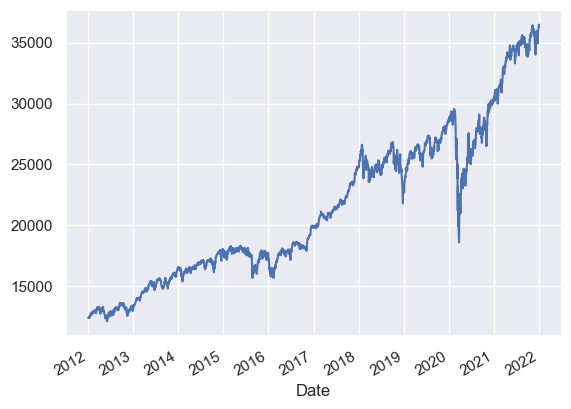

In [37]:
stooq.plot()

### Reamostragem e conversão de frequências

Uma necessidade comum de dados de séries temporais é a reamostragem em uma frequência maior ou menor.

Isso pode ser feito usando o método ``resample()``, ou o método muito mais simples ``asfreq()``.

A principal diferença entre os dois é que ``resample()`` é fundamentalmente uma _agregação de dados_, enquanto ``asfreq()`` é basicamente uma _seleção de dados_.

Dando uma olhada no preço de fechamento, vamos comparar o que os dois retornam quando reduzimos a amostragem dos dados.
Aqui vamos reamostrar os dados no final do ano comercial.

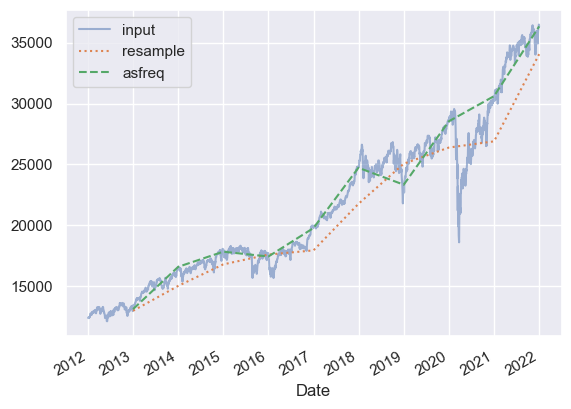

In [38]:
stooq.plot(alpha=0.5, style='-')
stooq.resample('BA').mean().plot(style=':')
stooq.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');